# DECISION TREE

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan/Classification/master/IrisDataset.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan/Classification/master/IrisDataset.csv')
X = dataset.iloc[:,:4].values
y = dataset['species'].values
dataset.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [ ]:
# Missing Value in Variabel
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
# Declare feature vector and target variable
X = df.drop(['species'], axis=1)
y = df['species']

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 21)

In [ ]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((100, 4), (50, 4))

In [ ]:
# check data types in X_train
X_train.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

In [ ]:
!pip install category_encoders
import category_encoders as ce

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.0 MB/s eta 0:00:00


In [ ]:
### encode variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=["sepal_length",	"sepal_width",	"petal_length",	"petal_width"])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [ ]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
52,1,1,1,1
49,2,2,2,2
65,3,1,3,3
118,4,3,4,4
55,5,4,5,5


In [ ]:
X_test.head()

,sepal_length,sepal_width,petal_length,petal_width
92,6.0,3.0,13.0,19.0
44,8.0,20.0,21.0,8.0
7,2.0,11.0,7.0,2.0
21,8.0,9.0,7.0,8.0
95,5.0,7.0,12.0,19.0


## IMPORT LIBRARY DECISION CLASSIFIER

In [ ]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=21)
# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=21)

In [ ]:
y_pred_gini = clf_gini.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.2f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.58


In [ ]:
y_pred_train_gini = clf_gini.predict(X_train)
y_pred_train_gini

array(['versicolor', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'versicolor', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'virginica',
       'setosa', 'virginica', 'setosa', 'setosa', 'versicolor',
       'virginica', 'virginica', 'versicolor', 'virginica', 'virginica',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'virginica', 'versicolor', 'virginica',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'setosa', 'virginica', 'virginica', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'setosa', 'virginica', 'setosa',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'virginica', 'virginica', 'virginica', 'vi

In [ ]:
print('Training-set accuracy score: {0:0.2f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.74


In [ ]:
# print the scores on training and test set
print('Training set score: {:.2f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.74
Test set score: 0.58


[Text(0.4230769230769231, 0.875, 'x[2] <= 11.5\ngini = 0.666\nsamples = 100\nvalue = [32, 33, 35]'),
 Text(0.15384615384615385, 0.625, 'x[3] <= 1.5\ngini = 0.535\nsamples = 45\nvalue = [28, 11, 6]'),
 Text(0.07692307692307693, 0.375, 'gini = 0.0\nsamples = 6\nvalue = [0, 6, 0]'),
 Text(0.23076923076923078, 0.375, 'x[3] <= 2.5\ngini = 0.444\nsamples = 39\nvalue = [28, 5, 6]'),
 Text(0.15384615384615385, 0.125, 'gini = 0.0\nsamples = 18\nvalue = [18, 0, 0]'),
 Text(0.3076923076923077, 0.125, 'gini = 0.635\nsamples = 21\nvalue = [10, 5, 6]'),
 Text(0.6923076923076923, 0.625, 'x[3] <= 8.5\ngini = 0.557\nsamples = 55\nvalue = [4, 22, 29]'),
 Text(0.5384615384615384, 0.375, 'x[2] <= 16.5\ngini = 0.548\nsamples = 28\nvalue = [4, 17, 7]'),
 Text(0.46153846153846156, 0.125, 'gini = 0.0\nsamples = 11\nvalue = [0, 11, 0]'),
 Text(0.6153846153846154, 0.125, 'gini = 0.651\nsamples = 17\nvalue = [4, 6, 7]'),
 Text(0.8461538461538461, 0.375, 'x[3] <= 16.5\ngini = 0.302\nsamples = 27\nvalue = [0, 5, 2

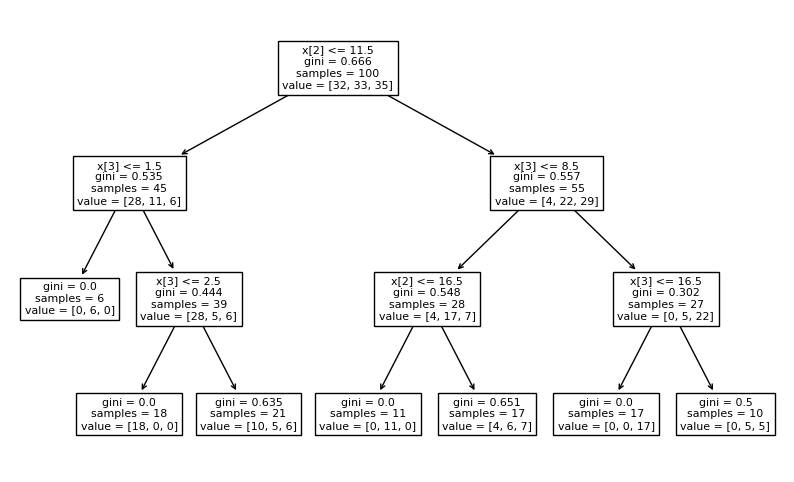

In [ ]:
plt.figure(figsize=(10,6))
from sklearn import tree
tree.plot_tree(clf_gini.fit(X_train, y_train)) 